In [2]:
#load all csv files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns



In [3]:

#load all csv files in the folder
path = '.'

files = os.listdir(path)
files = [file for file in files if file.endswith('.csv') and file.startswith('results_')]

dfs = []
names = []
for file in files:  
    df = pd.read_csv(file)
    name = file[len('results_'):-len('.csv')]
    # name = str(int(name[0])+1)+'>'+str(int(name[-1])+1)
    dfs += [df.mean(axis=0)]
    names += [name]

#concatenate all dataframes
df = pd.concat(dfs, ignore_index=True, axis=1)
df.columns = names

df = df.T

print(df)


      Parameter-based Transfer MSE  Instance-based Transfer MSE  IEEE 738 MSE  \
4_10                      0.550667                    25.904333      1.740667   
4_8                       0.710667                    10.695333      0.858000   
1_5                       0.581667                     2.412333      0.737333   
1_9                       2.233667                     2.176000      3.183000   
1_4                       0.915667                    21.676333      0.585667   
...                            ...                          ...           ...   
2_0                       1.872667                     4.630000      0.544000   
10_3                      1.833000                    16.911667      1.459667   
0_5                       0.799667                     4.249000      0.737333   
9_7                       1.117667                     2.948667      0.929667   
4_9                       1.916333                     2.235000      3.183000   

      Source Only MSE  Targ

/home/gianmarco/.conda/envs/DT4DTR/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


In [4]:
#df.to_csv('aggregate_results_no_tuning.csv', index=True)

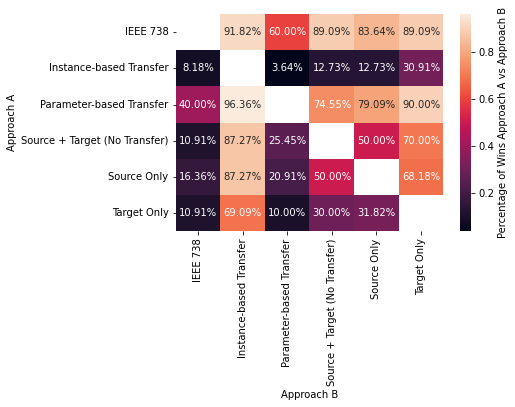

In [6]:
df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})

plt.savefig("all.eps", format='eps')
plt.savefig("all.png", format='png')


In [5]:
furthest_sensors = pd.read_csv('../furthest_sensors.csv')
closest_sensors = pd.read_csv('../closest_sensors.csv')
between_sensors = pd.read_csv('../between_sensors.csv')
maximum_sensors = pd.read_csv('../maximum_sensors.csv')
minimum_sensors = pd.read_csv('../minimum_sensors.csv')
median_sensors = pd.read_csv('../median_sensors.csv')

In [6]:
furthest_sensors_idx = (furthest_sensors['First Sensor'] - 1).astype('str')+'_'+(furthest_sensors['Second Sensor'] - 1).astype('str')
closest_sensors_idx = (closest_sensors['First Sensor'] - 1).astype('str')+'_'+(closest_sensors['Second Sensor'] - 1).astype('str')
between_sensors_idx = (between_sensors['First Sensor'] - 1).astype('str')+'_'+(between_sensors['Second Sensor'] - 1).astype('str')

maximum_sensors_idx = (maximum_sensors['First Sensor'] - 1).astype('str')+'_'+(maximum_sensors['Second Sensor'] - 1).astype('str')
minimum_sensors_idx = (minimum_sensors['First Sensor'] - 1).astype('str')+'_'+(minimum_sensors['Second Sensor'] - 1).astype('str')
median_sensors_idx = (median_sensors['First Sensor'] - 1).astype('str')+'_'+(median_sensors['Second Sensor'] - 1).astype('str')

furthest_sensors_idx = furthest_sensors_idx.tolist()
closest_sensors_idx = closest_sensors_idx.tolist()
between_sensors_idx = between_sensors_idx.tolist()
maximum_sensors_idx = maximum_sensors_idx.tolist()
minimum_sensors_idx = minimum_sensors_idx.tolist()
median_sensors_idx = median_sensors_idx.tolist()

to_delete = ['0_0', '1_1', '2_2', '3_3', '4_4', '5_5', '6_6', '7_7', '8_8', '9_9', '10_10']

closest_sensors_idx = [x for x in closest_sensors_idx if x not in to_delete]
furthest_sensors_idx = [x for x in furthest_sensors_idx if x not in to_delete]
between_sensors_idx = [x for x in between_sensors_idx if x not in to_delete]
maximum_sensors_idx = [x for x in maximum_sensors_idx if x not in to_delete]
minimum_sensors_idx = [x for x in minimum_sensors_idx if x not in to_delete]
median_sensors_idx = [x for x in median_sensors_idx if x not in to_delete]




In [7]:
furthest_df = df.loc[furthest_sensors_idx]
closest_df = df.loc[closest_sensors_idx]
between_df = df.loc[between_sensors_idx]
maximum_df = df.loc[maximum_sensors_idx]
minimum_df = df.loc[minimum_sensors_idx]
median_df = df.loc[median_sensors_idx]

# Furthest DF

<AxesSubplot:xlabel='Approach B', ylabel='Approach A'>

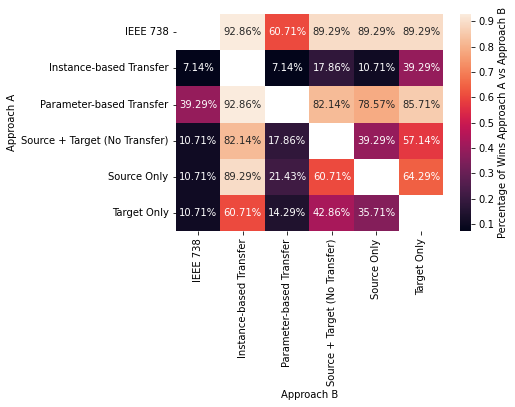

In [8]:
df = furthest_df

df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})
plt.savefig("futhest.eps", format='eps')
plt.savefig("futhest.png", format='png')

# Between Sensors

<AxesSubplot:xlabel='Approach B', ylabel='Approach A'>

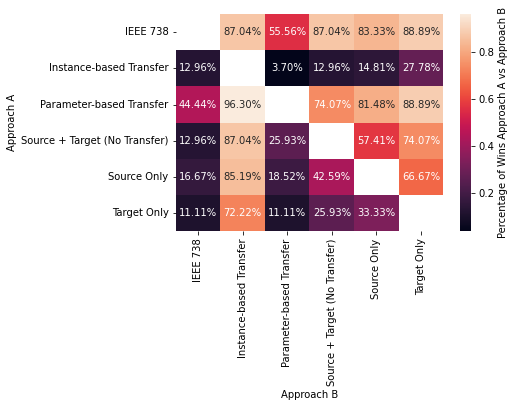

In [9]:
df = between_df

df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})
plt.savefig("between.eps", format='eps')
plt.savefig("between.png", format='png')

# Closest Sensors

<AxesSubplot:xlabel='Approach B', ylabel='Approach A'>

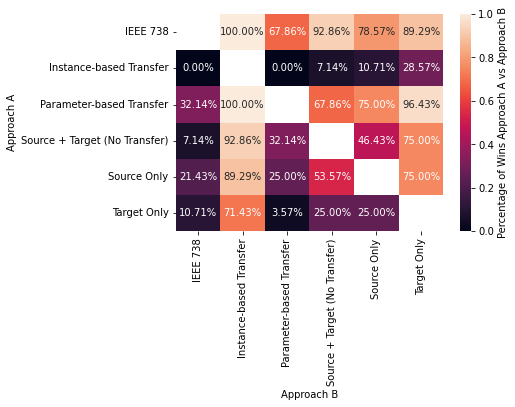

In [10]:
df = closest_df

df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})
plt.savefig("closest.eps", format='eps')
plt.savefig("closest.png", format='png')

# Minimum Sensors

<AxesSubplot:xlabel='Approach B', ylabel='Approach A'>

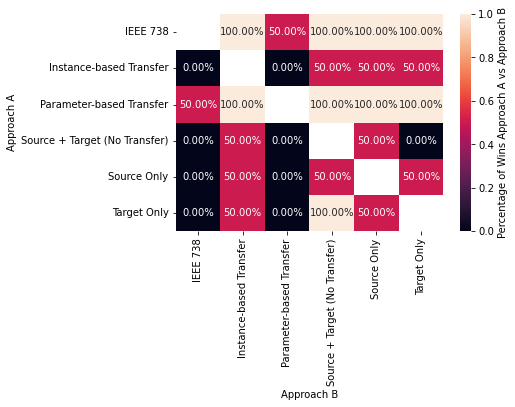

In [11]:
df = minimum_df

df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})
plt.savefig("minimum.eps", format='eps')
plt.savefig("minimum.png", format='png')

# Maximum Sensors

<AxesSubplot:xlabel='Approach B', ylabel='Approach A'>

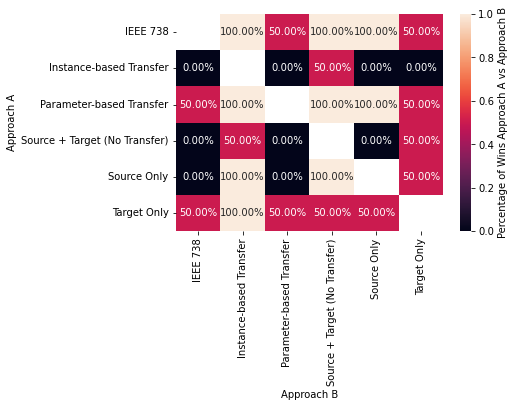

In [12]:
df = maximum_df

df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})


# Median Sensors

<AxesSubplot:xlabel='Approach B', ylabel='Approach A'>

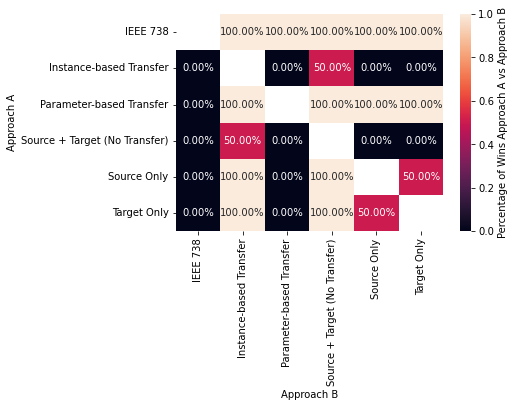

In [13]:
df = median_df

df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})
